# Getting started



### Learning NumPy

In [1]:
import numpy

In [2]:
numpy.version.full_version

'1.15.1'

In [3]:
from numpy import *

In [4]:
import numpy as np

In [5]:
a=np.array([0,1,2,3,4,5])
a


array([0, 1, 2, 3, 4, 5])

In [6]:
a.ndim

1

In [7]:
a.shape

(6,)

In [8]:
b=a.reshape((3,2))

In [9]:
b

array([[0, 1],
       [2, 3],
       [4, 5]])

In [10]:
b.ndim

2

In [11]:
b.shape

(3, 2)

In [12]:
b[1][0]=77

In [13]:
b

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [14]:
a

array([ 0,  1, 77,  3,  4,  5])

In [15]:
c = a.reshape((3,2)).copy()

In [16]:
c

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [17]:
c[0][0]=-99

In [18]:
c

array([[-99,   1],
       [ 77,   3],
       [  4,   5]])

In [19]:
a

array([ 0,  1, 77,  3,  4,  5])

In [20]:
b

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [21]:
d=np.array([1,2,3,4,5])

In [22]:
d*2

array([ 2,  4,  6,  8, 10])

In [23]:
d**2

array([ 1,  4,  9, 16, 25])

In [24]:
[1,2,3,4,5]*2

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [25]:
[1,2,3,4,5]**2

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

### Indexing

In [26]:
a[np.array([2,3,4])]

array([77,  3,  4])

In [27]:
a>4

array([False, False,  True, False, False,  True])

In [28]:
a[a>4]

array([77,  5])

In [29]:
a

array([ 0,  1, 77,  3,  4,  5])

In [30]:
a[a>4]=4

In [31]:
a

array([0, 1, 4, 3, 4, 4])

In [32]:
a.clip(0,4)

array([0, 1, 4, 3, 4, 4])

In [33]:
a.clip(1,3)

array([1, 1, 3, 3, 3, 3])

In [34]:
a.clip(0,4)

array([0, 1, 4, 3, 4, 4])

In [35]:
a.clip(0,3)

array([0, 1, 3, 3, 3, 3])

### Handling nonexisting values

In [36]:
c = np.array([1, 2, np.NAN, 3, 4]) # let's pretend we have read this from a text file

In [37]:
c

array([ 1.,  2., nan,  3.,  4.])

In [38]:
np.isnan(c)

array([False, False,  True, False, False])

In [39]:
c[~np.isnan(c)]

array([1., 2., 3., 4.])

In [40]:
np.mean(c[~np.isnan(c)])

2.5

### Comparing the runtime

In [41]:
import timeit
normal_py_sec=timeit.timeit('sum(x*x for x in range(1000))',number=10000)

In [42]:
naive_np_sec = timeit.timeit('sum(na*na)',setup="import numpy as np; na=np.arange(1000)",
number=10000)

In [43]:
good_np_sec = timeit.timeit('na.dot(na)',setup="import numpy as np; na=np.arange(1000)",
number=10000)

In [44]:
print("Normal Python: %f sec" % normal_py_sec)
print("Naive NumPy: %f sec" % naive_np_sec)
print("Good NumPy: %f sec" % good_np_sec)

Normal Python: 0.644951 sec
Naive NumPy: 0.837327 sec
Good NumPy: 0.021802 sec


In [45]:
a = np.array([1,2,3])

In [46]:
a.dtype

dtype('int64')

In [47]:
np.array([1, "stringy"])

array(['1', 'stringy'], dtype='<U21')

In [48]:
np.array([1, "stringy", set([1,2,3])])

array([1, 'stringy', {1, 2, 3}], dtype=object)

### Learning SciPy

In [49]:
import scipy, numpy

In [50]:
scipy.version.full_version

'1.1.0'

In [51]:
scipy.dot is numpy.dot

True

### Our first (tiny) application of machine learning

### Reading in the data

In [53]:
import scipy as sp
data = sp.genfromtxt("web_traffic.tsv", delimiter="\t")

In [54]:
print(data[:10])

[[1.000e+00 2.272e+03]
 [2.000e+00       nan]
 [3.000e+00 1.386e+03]
 [4.000e+00 1.365e+03]
 [5.000e+00 1.488e+03]
 [6.000e+00 1.337e+03]
 [7.000e+00 1.883e+03]
 [8.000e+00 2.283e+03]
 [9.000e+00 1.335e+03]
 [1.000e+01 1.025e+03]]


In [55]:
print(data.shape)

(743, 2)


### Preprocessing and cleaning the data

In [56]:
x = data[:,0]

In [57]:
y = data[:,1]

In [58]:
sp.sum(sp.isnan(y))

8

In [59]:
x = x[~sp.isnan(y)]

In [60]:
y = y[~sp.isnan(y)]

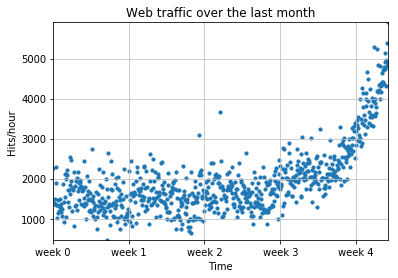

In [65]:
import matplotlib.pyplot as plt
# plot the (x,y) points with dots of size 10
plt.scatter(x, y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
# draw a slightly opaque, dashed grid
plt.grid(True, linestyle='-', color='0.75')
plt.show()

## Choosing the right model and learning algorithm

### Before building our first model...

In [68]:
def error(f, x, y):
    return sp.sum((f(x)-y)**2)

### Starting with a simple straight line

In [69]:
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)

In [70]:
print("Model parameters: %s" % fp1)

Model parameters: [  2.59619213 989.02487106]


In [71]:
print(residuals)

[3.17389767e+08]


In [72]:
f1 = sp.poly1d(fp1)

In [73]:
print(error(f1, x, y))

317389767.339778


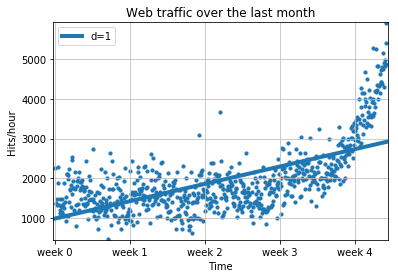

In [80]:
fx = sp.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f1(fx), linewidth=4)
plt.legend(["d=%i" % f1.order], loc="upper left")
plt.scatter(x, y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
# draw a slightly opaque, dashed grid
plt.grid(True, linestyle='-', color='0.75')
plt.show()

### Towards some advanced stuff

In [77]:
f2p = sp.polyfit(x, y, 2)
print(f2p)

[ 1.05322215e-02 -5.26545650e+00  1.97476082e+03]


In [78]:
f2 = sp.poly1d(f2p)

In [79]:
print(error(f2, x, y))

179983507.8781792


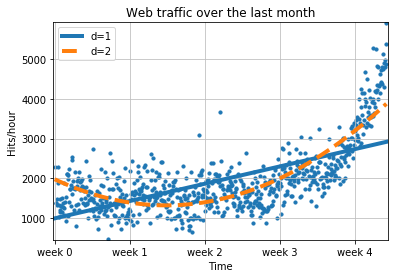

In [114]:
fx = sp.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f1(fx), linewidth=4)
plt.plot(f2x, f2(fx), '--',linewidth=4)
plt.legend(["d=%i" % f1.order,"d=%i" % f2.order], loc="upper left")
plt.scatter(x, y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
# draw a slightly opaque, dashed grid
plt.grid(True, linestyle='-', color='0.75')

plt.show()

/home/ayush/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """


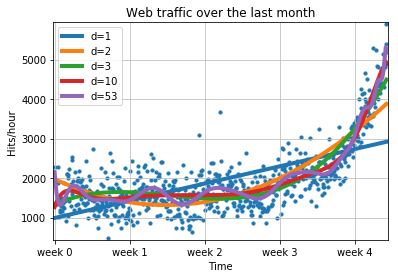

In [116]:
f3p = sp.polyfit(x, y, 3)
f3 = sp.poly1d(f3p)
f10p = sp.polyfit(x, y, 10)
f10 = sp.poly1d(f10p)
f53p = sp.polyfit(x, y, 53)
f53 = sp.poly1d(f53p)

fx = sp.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f1(fx), linewidth=4)


plt.plot(fx, f2(fx),linewidth=4)


plt.plot(fx, f3(fx), linewidth=4)

plt.plot(fx, f10(fx),linewidth=4)


plt.plot(fx, f53(fx), linewidth=4)

plt.legend(["d=%i" % f1.order,"d=%i" % f2.order,"d=%i" % f3.order,"d=%i" % f10.order,"d=%i" % f53.order], loc="upper left")
plt.scatter(x, y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)],['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
# draw a slightly opaque, dashed grid
plt.grid(True, linestyle='-', color='0.75')

plt.show()


In [100]:
print("Error d=%i: %f" %(f1.order,error(f1, x, y)))
print("Error d=%i: %f" %(f2.order,error(f2, x, y)))
print("Error d=%i: %f" %(f3.order,error(f3, x, y)))
print("Error d=%i: %f" %(f10.order,error(f10, x, y)))
print("Error d=%i: %f" %(f53.order,error(f53, x, y)))

Error d=1: 317389767.339778
Error d=2: 179983507.878179
Error d=3: 139350144.031725
Error d=10: 121942326.363474
Error d=53: 109452397.771183


### Stepping back to go forward – another look at our data

In [126]:
inf = 3.5*7*24 # calculate the inflection point in hours
inflection=int(inf)
xa = x[:inflection] # data before the inflection point
ya = y[:inflection]
xb = x[inflection:] # data after
yb = y[inflection:]
fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))
fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)
print("Error inflection=%f" % (fa_error + fb_error))

Error inflection=132950348.197616


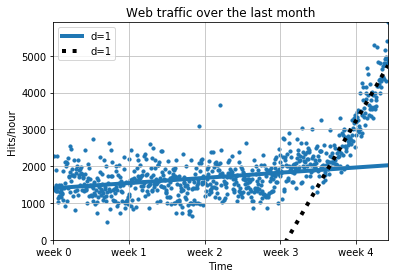

In [128]:
plt.scatter(x, y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.ylim(ymin=0)
plt.xticks([w*7*24 for w in range(10)],['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
plt.ylim(ymin=0)
plt.grid(True, linestyle='-', color='0.75')
plt.plot(fx, fa(fx), linewidth=4)
plt.plot(fx, fb(fx) ,':',color='k' ,linewidth=4)
plt.legend(["d=%i" % fa.order,"d=%i" % fb.order], loc="upper left")

/home/ayush/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.


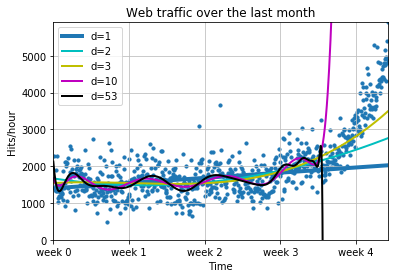

In [136]:
fa2 = sp.poly1d(sp.polyfit(xa, ya, 2))
fa3 = sp.poly1d(sp.polyfit(xa, ya, 3))
fa10 = sp.poly1d(sp.polyfit(xa, ya, 10))
fa53 = sp.poly1d(sp.polyfit(xa, ya, 53))
plt.scatter(x, y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.ylim(ymin=0)
plt.xticks([w*7*24 for w in range(10)],['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
plt.ylim(ymin=0)
plt.grid(True, linestyle='-', color='0.75')
plt.plot(fx, fa(fx), linewidth=4)
plt.plot(fx, fa2(fx),'c', linewidth=2)
plt.plot(fx, fa3(fx),'y', linewidth=2)
plt.plot(fx, fa10(fx),'m', linewidth=2)
plt.plot(fx, fa53(fx),color='k' ,linewidth=2)
plt.legend(["d=%i" % fa.order,"d=%i" % fa2.order,"d=%i" % fa3.order,"d=%i" % fa10.order,"d=%i" % fa53.order], loc="upper left")

### Training and testing

### Answering our initial question

In [137]:
frac = 0.3
split_idx = int(frac * len(xb))
shuffled = sp.random.permutation(list(range(len(xb))))
test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])
fbt1 = sp.poly1d(sp.polyfit(xb[train], yb[train], 1))
fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))
fbt3 = sp.poly1d(sp.polyfit(xb[train], yb[train], 3))
fbt10 = sp.poly1d(sp.polyfit(xb[train], yb[train], 10))
fbt53 = sp.poly1d(sp.polyfit(xb[train], yb[train], 53))
print("Test errors for only the time after inflection point")
for f in [fbt1, fbt2, fbt3, fbt10, fbt100]:
 print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))

Test errors for only the time after inflection point
Error d=1: 6633920.649830
Error d=2: 5638065.248584
Error d=3: 5683580.553840
Error d=10: 5487391.975058
Error d=53: 5297864.703535


/home/ayush/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RankWarning: Polyfit may be poorly conditioned
  if __name__ == '__main__':
/home/ayush/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.


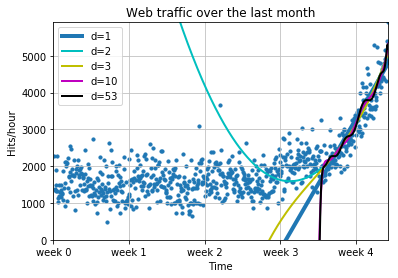

In [139]:
plt.scatter(x, y, s=10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.ylim(ymin=0)
plt.xticks([w*7*24 for w in range(10)],['week %i' % w for w in range(10)])
plt.autoscale(tight=True)
plt.ylim(ymin=0)
plt.grid(True, linestyle='-', color='0.75')
plt.plot(fx,fbt1(fx), linewidth=4)
plt.plot(fx, fbt2(fx),'c', linewidth=2)
plt.plot(fx, fbt3(fx),'y', linewidth=2)
plt.plot(fx, fbt10(fx),'m', linewidth=2)
plt.plot(fx,fbt53(fx),color='k' ,linewidth=2)
plt.legend(["d=%i" % fbt1.order,"d=%i" % fbt2.order,"d=%i" % fbt3.order,"d=%i" % fbt10.order,"d=%i" % fbt53.order], loc="upper left")

In [123]:
fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))
print("fbt2(x)= \n%s" % fbt2)

fbt2(x)= 
         2
0.06473 x - 64.69 x + 1.739e+04


In [124]:
print("fbt2(x)-100,000= \n%s" % (fbt2-100000))

fbt2(x)-100,000= 
         2
0.06473 x - 64.69 x - 8.261e+04


In [125]:
from scipy.optimize import fsolve
reached_max = fsolve(fbt2-100000, x0=800)/(7*24)
print("100,000 hits/hour expected at week %f" % reached_max[0])

100,000 hits/hour expected at week 10.326407
